Joseph Cortez - Programming for Data Analytics 4313 001 Project Code (Fall 2021)

In [46]:
#import numpy as np
import pandas as pd

dataset = pd.read_csv('AB_US_2020.csv')

/Users/joseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,36,-83,Private room,60,1,138,16/02/20,1,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,36,-83,Entire home/apt,470,1,114,07/09/20,1,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,36,-83,Entire home/apt,75,30,89,30/11/19,1,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,36,-83,Entire home/apt,90,1,267,22/09/20,2,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,36,-83,Private room,125,30,58,19/10/15,1,1,0,Asheville


In [48]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [49]:
#dataset['room_type'] = dataset['room_type'].map({'Private room': 1, 'Entire home/apt': 0})

#removing all rows with a listing price over $14,000 to remove outliers from the dataset
dataset.drop(dataset[dataset['price'] >= 14000].index, inplace = True)
y = dataset['price']

feature = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
X = dataset[feature]
X = X.fillna(0)
X

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,36,-83,60,1,138,1,1,0
1,36,-83,470,1,114,1,11,288
2,36,-83,75,30,89,1,2,298
3,36,-83,90,1,267,2,5,0
4,36,-83,125,30,58,1,1,0
...,...,...,...,...,...,...,...,...
226025,39,-77,104,1,0,0,2,99
226026,39,-77,151,2,0,0,1,300
226027,39,-77,240,2,0,0,1,173
226028,39,-77,60,21,0,0,5,362


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.1,random_state=100)
dt=DecisionTreeRegressor(min_samples_leaf=.001)
dt.fit(train_x,train_y)
pred_y=dt.predict(test_x)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, train_x, train_y, cv=5)
print("accuracy: %0.4f" % scores.mean())

accuracy: 0.9902


In [51]:
#formatting the output dataframe

output = pd.DataFrame()
output["Predicted Price"] = pred_y
output["Original Price"] = dataset.price
output["id"] = dataset.id

#source: https://datagy.io/reorder-pandas-columns/
def reorder_columns(dataframe, col_name, position):
    temp_col = dataframe[col_name]
    dataframe = dataframe.drop(columns=[col_name])
    dataframe.insert(loc=position, column=col_name, value=temp_col)
    return dataframe

output = reorder_columns(dataframe=output, col_name='id', position=0)

#remove any decimal values
pd.options.display.float_format = '{:.0f}'.format

#removing outliers once the output has been created
output.drop(output[output['Predicted Price'] - output['Original Price'] >= 300].index, inplace = True)
output.drop(output[output['Original Price'] - output['Predicted Price'] >= 300].index, inplace = True)


In [52]:
output.to_csv("submission.csv", index=False)
output

,id,Predicted Price,Original Price
0,38585,37,60
3,155305,45,90
4,160594,149,125
5,209068,50,134
6,213006,160,48
...,...,...,...
22595,36701449,79,250
22596,36701579,125,119
22597,36702383,45,29
22598,36713769,412,275


<AxesSubplot:xlabel='Original Price', ylabel='id'>

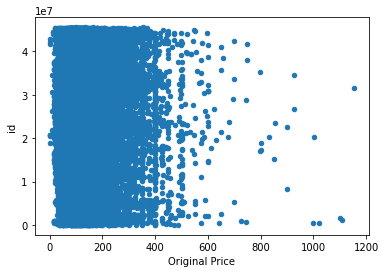

In [53]:
original_price = output.plot.scatter(x='Original Price',y=0)
original_price

<AxesSubplot:xlabel='Predicted Price', ylabel='id'>

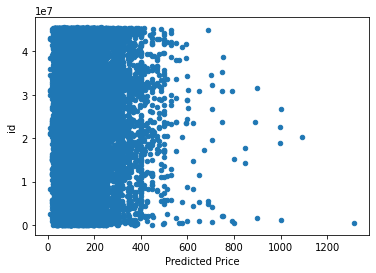

In [54]:
predicted_price = output.plot.scatter(x='Predicted Price',y=0)
predicted_price